In [0]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os
import pandas as pd

In [2]:
stringed = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04338517") 
print(stringed.content)
stringed_soup = BeautifulSoup(stringed.content, 'html.parser')

b"http://isfudo.webcindario.com/piano0.jpg\r\nhttp://www.ilovemusica.com/photos/img_2105.jpg\r\nhttp://www.ibaypro.eu/image.php?type=P&id=16739\r\nhttp://www.caterinagenta.com/decalogo/gujang.jpg\r\nhttp://images.channeladvisor.com/Sell/SSProfiles/82000025/Images/15/YMG-SB.jpg\r\nhttp://web.educastur.princast.es/cursos/imagen/archivos/cursoimagen/ORTEGA_LOPEZ_PABLO.jpg\r\nhttp://g-ecx.images-amazon.com/images/G/01/ciu/a3/03/16af820dd7a05e3d714ae010._AA280_.L.jpg\r\nhttp://www.viaurbium.com/cms/images/full/c0c7c76d30bd3dcaefc96f40275bdc0a_.jpg\r\nhttp://www.quebesistersband.com/images/drew_phelps.jpg\r\nhttp://genesis.uag.mx/edmedia/material/tmusica/images/Arpa.jpg\r\nhttp://personal.myvine.com/~leoposch/DSCN0016a.jpg\r\nhttp://www.fireballrockband.com/images/photos/gallery/288716-thumb.jpg\r\nhttp://www.hartford-hwp.com/archives/55a/176b.png\r\nhttp://i13.ebayimg.com/04/i/000/dd/8f/04eb_1.JPG\r\nhttp://www.heritageethnicmusic.com/members/607029/uploaded/strings/Cross%20Strung%20Harps.j

In [5]:
jews = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03597916")  
print(jews.content)
jews_soup = BeautifulSoup(jews.content, 'html.parser')

b"http://www.sudeepaudio.com/folk/imgs/murchang.gif\r\nhttp://www.fotosearch.com/bthumb/phd/PHD144/os34021.jpg\r\nhttp://www.mouthmusic.com/images/HORZCOL3.JPG\r\nhttp://www.didgebits.com/files/distributor_product_bits/AJewsHarp.jpg\r\nhttp://www.jewsharpguild.org/images/Trophy_1stnote.jpg\r\nhttp://minimmusic.co.uk/images/JAWS_HARP2.jpg\r\nhttp://www.arikah.com/encyclopedia/images/7/79/JewsHarpCivilWar.jpg\r\nhttp://farm1.static.flickr.com/190/496599371_ea10f20abb.jpg?v=0\r\nhttp://static.flickr.com/183/428003126_8ffdb982cb.jpg\r\nhttp://www.buona-vista.com/pic-labo/limg/5-3-5.jpg\r\nhttp://static.flickr.com/113/291306256_f8e0be6e9e.jpg\r\nhttp://blog90.fc2.com/a/ayeyai/file/jews-harp.jpg\r\nhttp://khomus.ru/photos/gotov1_ic.jpg\r\nhttp://es.woodbrass.com/images/woodbrass/guimbarde.jpg\r\nhttp://farm1.static.flickr.com/187/386964067_50055b78bb.jpg\r\nhttp://static.flickr.com/159/433423105_80f40faf99.jpg\r\nhttp://www.koizumigakki.com/02item/04-koukin/001/koukin001.jpg\r\nhttp://www.kh

In [4]:
wind = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04586932") 
print(wind.content)
wind_soup = BeautifulSoup(wind.content, 'html.parser') 

b'http://farm1.static.flickr.com/141/361514000_ba10cc390b.jpg?v=0\r\nhttp://www.tulumba.com/mmTULUMBA/Images/HO100011XA002_250.jpg\r\nhttp://imgsrc.baidu.com/baike/abpic/item/7a8a1446f89b9b1a6b63e5bc.jpg\r\nhttp://static.flickr.com/2266/2434819619_375d690cfd.jpg\r\nhttp://www.artists-india.com/i/shailesh_bhagwat.jpg\r\nhttp://hk.geocities.com/blcwcband/intru_pic/horn.gif\r\nhttp://www.balkanfolk.com/pic/shop-products/thumb3/530-bulgarian-kaba-gaida-bagpipe.jpg\r\nhttp://comemusic.com/icon/book/instrument/jpg/saxophone.jpg\r\nhttp://yzjade.com/skyway/images/4005.gif\r\nhttp://www.windblowers.com/images/news/1-25-AKAI-EWI-4000s.jpg\r\nhttp://www.daviddalesio.it/page1/images/curriculum_html_5d3b9de0.jpg\r\nhttp://www.mercadolibre.cl/jm/img?s=MLC&f=5894107_6624.jpg&v=P\r\nhttp://www.brassreview.com/reviews/data/147/1brasswind_490L.jpg\r\nhttp://aero.ofps.edu.hk/%7Ecyberfair/music/images/wind_e.jpg\r\nhttp://www.xmusicpro.com/product_images/334_medium.jpg\r\nhttp://impactinit.assetsdelivery

In [6]:
stringed_str_soup=str(stringed_soup)
type(stringed_str_soup)
stringed_split_urls=stringed_str_soup.split('\r\n')
print(len(stringed_split_urls))

2029


In [7]:
wind_str_soup=str(wind_soup)
type(wind_str_soup)
wind_split_urls=wind_str_soup.split('\r\n')
print(len(wind_split_urls))

1434


In [8]:
jews_str_soup=str(jews_soup)
type(jews_str_soup)
jews_split_urls=jews_str_soup.split('\r\n')
print(len(jews_split_urls))

554


In [0]:
!mkdir /content/instrument_train/ 
!mkdir /content/instrument_test/ 
!mkdir /content/instrument_train/stringed
!mkdir /content/instrument_train/wind
!mkdir /content/instrument_train/jews

In [0]:
img_rows, img_cols = 32, 32 
input_shape = (img_rows, img_cols, 3)

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	
	return image

n_of_training_images=150

In [11]:
for progress in range(n_of_training_images):
 
    if(progress%20==0):
        print(progress)
    if not stringed_split_urls[progress] == None:
      try:
        I = url_to_image(stringed_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/instrument_train/stringed/stringed.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


In [12]:
for progress in range(n_of_training_images):
 
    if(progress%20==0):
        print(progress)
    if not wind_split_urls[progress] == None:
      try:
        I = url_to_image(wind_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/instrument_train/wind/wind.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


In [13]:
for progress in range(n_of_training_images):
 
    if(progress%20==0):
        print(progress)
    if not jews_split_urls[progress] == None:
      try:
        I = url_to_image(jews_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/instrument_train/jews/jews.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


In [0]:
X=[]
Z=[]
IMG_SIZE=150
STRINGED_DIR='/content/instrument_train/stringed'
JEWS_DIR='/content/instrument_train/jews'
WIND_DIR='/content/instrument_train/wind'

In [0]:
def assign_label(img,instrument_type):
    return instrument_type

In [0]:
def make_train_data(instrument_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,instrument_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
from tqdm import tqdm

In [18]:
make_train_data('Stringed',STRINGED_DIR)
print(len(X))

100%|██████████| 41/41 [00:00<00:00, 275.15it/s]

41


In [19]:
make_train_data('Jews',JEWS_DIR)
print(len(X))

100%|██████████| 84/84 [00:00<00:00, 339.73it/s]

125


In [20]:
make_train_data('Wind',WIND_DIR)
print(len(X))

100%|██████████| 38/38 [00:00<00:00, 310.69it/s]

163


In [21]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,3)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

In [0]:
batch_size=9
epochs=25

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [28]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [32]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), 
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/25
14/14 [==============================] - 8s 545ms/step - loss: 0.6150 - acc: 0.6472 - val_loss: 0.6422 - val_acc: 0.6263
Epoch 2/25
14/14 [==============================] - 8s 565ms/step - loss: 0.5573 - acc: 0.7090 - val_loss: 0.6553 - val_acc: 0.6869
Epoch 3/25
14/14 [==============================] - 8s 536ms/step - loss: 0.5236 - acc: 0.7633 - val_loss: 0.6930 - val_acc: 0.6465
Epoch 4/25
14/14 [==============================] - 8s 551ms/step - loss: 0.4906 - acc: 0.7759 - val_loss: 0.8315 - val_acc: 0.6667
Epoch 5/25
14/14 [==============================] - 8s 554ms/step - loss: 0.6030 - acc: 0.7144 - val_loss: 0.6558 - val_acc: 0.6263
Epoch 6/25
14/14 [==============================] - 8s 572ms/step - loss: 0.6412 - acc: 0.6799 - val_loss: 0.6357 - val_acc: 0.6566
Epoch 7/25
14/14 [==============================] - 8s 553ms/step - loss: 0.5714 - acc: 0.6852 - val_loss: 0.6122 - val_acc: 0.6465
Epoch 8/25
14/14 [==============================] - 8s 553ms/step - loss: 0.

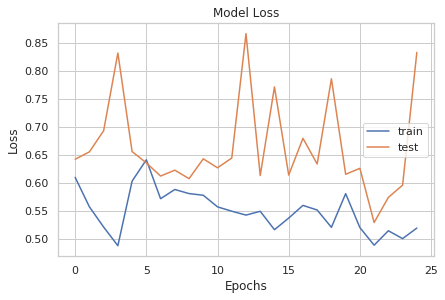

In [33]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

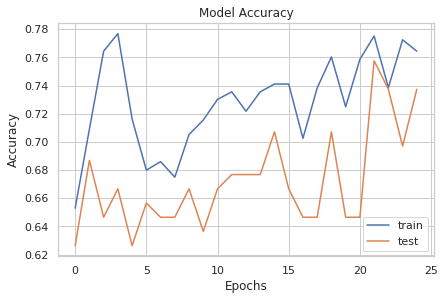

In [34]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

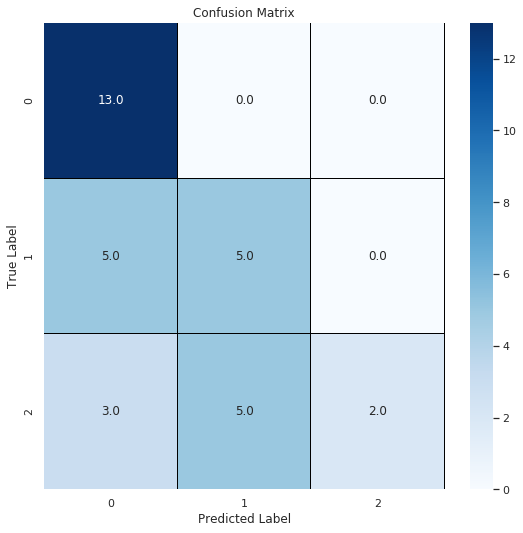

In [35]:
import seaborn as sns
Y_pred = model.predict(x_test) 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()